
# Advanced Linear Models: GLMs, GAMs, and Interaction Terms


In this notebook, we will explore some advanced topics in linear models that go beyond the standard Linear and Logistic Regression. We will delve into **Generalized Linear Models (GLMs)**, **Generalized Additive Models (GAMs)**, and the concept of **Interaction Terms**. These models provide greater flexibility and allow us to model a wider range of data and relationships.

After completing activities on Linear Regression and Logistic Regression, this notebook will help you understand how to extend these basic models to handle more complex scenarios.



## 1. Overview

Linear models are fundamental tools in machine learning and statistics. However, they have limitations:

- **Linear Regression** assumes a linear relationship between predictors and the response, and that the response is normally distributed.
- **Logistic Regression** is designed for binary classification problems.

What happens when we need to model:
- Count data (e.g., number of events)?
- Non-linear relationships between predictors and response?
- Situations where the effect of one variable depends on another?

This is where **GLMs**, **GAMs**, and **Interaction Terms** come into play.



## 2. Generalized Linear Models (GLMs)

### 2.1 What are GLMs?

Generalized Linear Models (GLMs) are a flexible generalization of ordinary linear regression. They allow for response variables that have error distribution models other than a normal distribution. The GLM generalizes linear regression by allowing the linear model to be related to the response variable via a **link function** and by allowing the magnitude of the variance of each measurement to be a function of its predicted value.

### 2.2 Components of a GLM

GLMs are composed of three main components:

| Component | Description | Examples |
|-----------|-------------|----------|
| **Random Component** | The probability distribution of the response variable | Gaussian, Poisson, Binomial, Gamma |
| **Systematic Component** | The linear predictor: η = β₀ + β₁X₁ + ... + βₚXₚ | Linear combination of predictors |
| **Link Function** | A function that links the expected value of the response to the linear predictor | Identity (linear), Log (Poisson), Logit (logistic) |

### 2.3 Common GLM Families

Different types of response variables require different probability distributions:

- **Gaussian (Normal)**: Continuous data (standard linear regression)
- **Poisson**: Count data (number of events)
- **Binomial**: Binary or proportion data (logistic regression)
- **Gamma**: Positive continuous data with constant coefficient of variation

### 2.4 Example: Poisson Regression

Poisson regression is used when the response variable represents count data. The link function is the natural logarithm, which ensures that predicted values are always positive.

**Use Case:** Predicting the number of executions based on socioeconomic factors.


In [3]:

# Import necessary libraries
import statsmodels.api as sm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('https://raw.githubusercontent.com/statsmodels/statsmodels/main/statsmodels/datasets/cpunish/cpunish.csv')

# Display the first few rows of the dataframe
print("Dataset Preview:")
display(df.head())
print("\nDataset Shape:", df.shape)
print("\nColumns:", df.columns.tolist())


Dataset Preview:


,STATE,EXECUTIONS,INCOME,PERPOVERTY,PERBLACK,VC100k96,SOUTH,DEGREE
0,Texas,37,34453,16.7,12.2,644,1,0.16
1,Virginia,9,41534,12.5,20.0,351,1,0.27
2,Missouri,6,35802,10.6,11.2,591,0,0.21
3,Arkansas,4,26954,18.4,16.1,524,1,0.16
4,Alabama,3,31468,14.8,25.9,565,1,0.19



Dataset Shape: (17, 8)

Columns: ['STATE', 'EXECUTIONS', 'INCOME', 'PERPOVERTY', 'PERBLACK', 'VC100k96', 'SOUTH', 'DEGREE']


In [4]:

# Prepare the data for GLM
X = df[['INCOME', 'PERPOVERTY', 'PERBLACK', 'VC100k96', 'SOUTH', 'DEGREE']]
X = sm.add_constant(X)  # Add intercept
y = df['EXECUTIONS']

# Fit a Poisson GLM
poisson_model = sm.GLM(y, X, family=sm.families.Poisson()).fit()

# Print the model summary
print(poisson_model.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:             EXECUTIONS   No. Observations:                   17
Model:                            GLM   Df Residuals:                       10
Model Family:                 Poisson   Df Model:                            6
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -32.126
Date:                Mon, 27 Oct 2025   Deviance:                       18.988
Time:                        22:31:21   Pearson chi2:                     25.3
No. Iterations:                     5   Pseudo R-squ. (CS):             0.9990
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.7702      2.660     -1.793      0.0


### 2.5 Interpreting the Results

In the Poisson regression output:

- **Coefficients**: The coefficients are on the log scale. To interpret them, we need to exponentiate them. For example, if the coefficient for INCOME is 0.0003, then exp(0.0003) ≈ 1.0003, meaning a one-unit increase in INCOME is associated with a 0.03% increase in the expected count of executions.

- **P-values**: Indicate whether each predictor is statistically significant.

- **Deviance**: Measures the goodness of fit. Lower deviance indicates a better fit.



## 3. Generalized Additive Models (GAMs)

### 3.1 What are GAMs?

Generalized Additive Models (GAMs) are an extension of GLMs where the linear predictor is replaced by the sum of smooth functions of the predictors. This allows for more flexible, non-linear relationships between the predictors and the response variable.

### 3.2 Mathematical Formulation

Instead of a strict linear relationship:

**GLM:** g(E[Y]) = β₀ + β₁X₁ + β₂X₂ + ... + βₚXₚ

**GAM:** g(E[Y]) = β₀ + f₁(X₁) + f₂(X₂) + ... + fₚ(Xₚ)

where f(X) are smooth functions (often represented by splines).

### 3.3 Advantages of GAMs

- **Flexibility**: Can capture complex non-linear patterns without specifying the exact functional form.
- **Interpretability**: Each smooth function can be visualized to understand the relationship between a predictor and the response.
- **Additivity**: The effect of each predictor is additive, making the model easier to interpret than fully non-linear models.

### 3.4 Example: GAM with Synthetic Data

Since the wage dataset has path issues, we'll create a synthetic dataset to demonstrate GAMs.


In [6]:
# !uv pip install pygam

In [7]:

from pygam import LinearGAM, s
import numpy as np
import matplotlib.pyplot as plt

# Create synthetic data with non-linear relationships
np.random.seed(42)
n_samples = 200

# Feature 1: Age (20 to 70)
age = np.random.uniform(20, 70, n_samples)

# Feature 2: Experience (0 to 40)
experience = np.random.uniform(0, 40, n_samples)

# Response: Wage with non-linear relationships
# Wage increases with age (with diminishing returns) and experience (quadratic)
wage = (50 + 2 * np.sqrt(age) + 0.5 * experience - 0.01 * experience**2 + 
        np.random.normal(0, 5, n_samples))

# Combine into a design matrix
X = np.column_stack([age, experience])

print("Synthetic Dataset Created")
print(f"Number of samples: {n_samples}")
print(f"Features: Age, Experience")
print(f"Response: Wage")


Synthetic Dataset Created
Number of samples: 200
Features: Age, Experience
Response: Wage


In [8]:

# Fit a GAM with smooth terms for both features
gam = LinearGAM(s(0, n_splines=10) + s(1, n_splines=10)).fit(X, wage)

# Print the model summary
print(gam.summary())


LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     10.9997
Link Function:                     IdentityLink Log Likelihood:                                  -823.1582
Number of Samples:                          200 AIC:                                             1670.3158
                                                AICc:                                            1671.9842
                                                GCV:                                               26.5977
                                                Scale:                                             23.9782
                                                Pseudo R-Squared:                                   0.2946
Feature Function                  Lam

/var/folders/48/j6k669vx63qd_68k2_502cl40000gn/T/ipykernel_77225/1169271625.py:5: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  print(gam.summary())


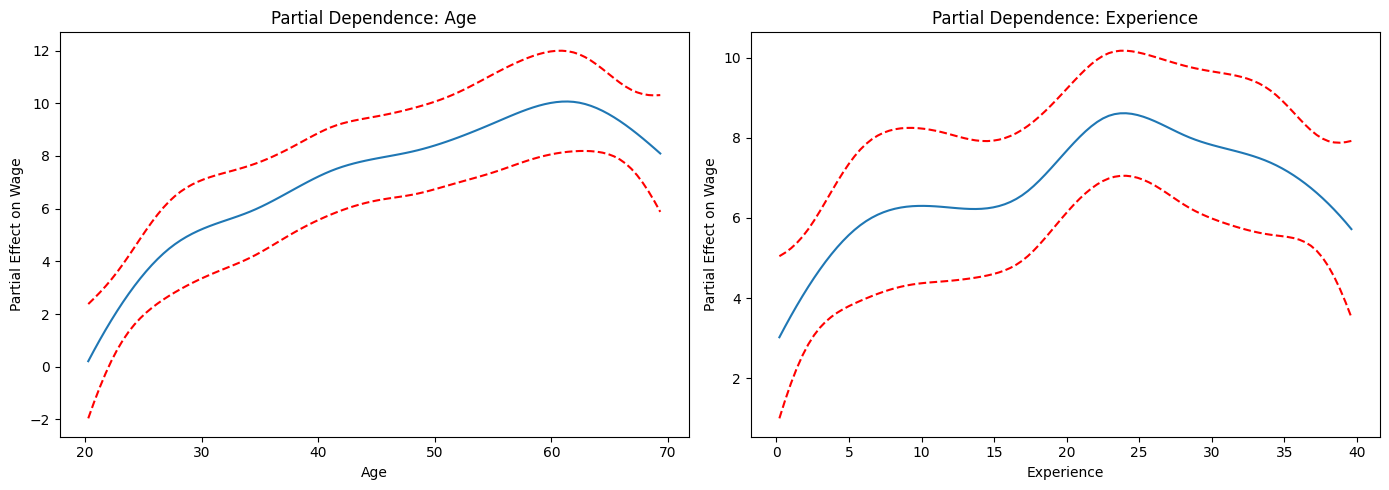

In [9]:

# Plot partial dependence plots
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

# Plot for Age
XX = gam.generate_X_grid(term=0)
axs[0].plot(XX[:, 0], gam.partial_dependence(term=0, X=XX))
axs[0].plot(XX[:, 0], gam.partial_dependence(term=0, X=XX, width=0.95)[1], c='r', ls='--')
axs[0].set_xlabel('Age')
axs[0].set_ylabel('Partial Effect on Wage')
axs[0].set_title('Partial Dependence: Age')

# Plot for Experience
XX = gam.generate_X_grid(term=1)
axs[1].plot(XX[:, 1], gam.partial_dependence(term=1, X=XX))
axs[1].plot(XX[:, 1], gam.partial_dependence(term=1, X=XX, width=0.95)[1], c='r', ls='--')
axs[1].set_xlabel('Experience')
axs[1].set_ylabel('Partial Effect on Wage')
axs[1].set_title('Partial Dependence: Experience')

plt.tight_layout()
plt.show()



### 3.5 Interpreting GAM Plots

The **partial dependence plots** show how each feature affects the response variable while holding other features constant:

- The solid line shows the estimated smooth function.
- The dashed lines show the confidence intervals.
- Non-linear patterns indicate that a simple linear model would not capture the relationship adequately.

In our synthetic example:
- **Age** shows a non-linear relationship (square root function).
- **Experience** shows a quadratic relationship (increases then levels off).



## 4. Interaction Terms

### 4.1 What are Interaction Terms?

Interaction terms account for the combined effect of two or more predictors on the response variable. In other words, an interaction term is used when the effect of one predictor variable on the response variable is **different at different values** of another predictor variable.

### 4.2 Mathematical Formulation

For two predictors, X₁ and X₂, an interaction term is created by multiplying the two predictors: X₁ × X₂.

**Model without interaction:**
Y = β₀ + β₁X₁ + β₂X₂ + ε

**Model with interaction:**
Y = β₀ + β₁X₁ + β₂X₂ + β₃(X₁ × X₂) + ε

Here, the coefficient β₃ represents the interaction effect.

### 4.3 Interpreting Interaction Terms

When an interaction term is present:

- **β₁**: The effect of X₁ on Y when X₂ = 0
- **β₂**: The effect of X₂ on Y when X₁ = 0
- **β₃**: How the effect of X₁ on Y changes for each unit increase in X₂ (and vice versa)

### 4.4 Example: Interaction between Literacy and Wealth

We'll use the Guerry dataset, which contains data on French departments in the 1830s, to explore the interaction between literacy and wealth on lottery participation.


In [10]:

import statsmodels.formula.api as smf

# Load the dataset
df_interaction = sm.datasets.get_rdataset("Guerry", "HistData").data

print("Dataset Preview:")
print(df_interaction[['Lottery', 'Literacy', 'Wealth']].head())
print("\nDataset Shape:", df_interaction.shape)


Dataset Preview:
   Lottery  Literacy  Wealth
0       41        37      73
1       38        51      22
2       66        13      61
3       80        46      76
4       79        69      83

Dataset Shape: (86, 23)


In [11]:

# Fit a model WITHOUT interaction terms
model_no_interaction = smf.ols(formula='Lottery ~ Literacy + Wealth', data=df_interaction).fit()

print("Model WITHOUT Interaction:")
print(model_no_interaction.summary())


Model WITHOUT Interaction:
                            OLS Regression Results                            
Dep. Variable:                Lottery   R-squared:                       0.289
Model:                            OLS   Adj. R-squared:                  0.272
Method:                 Least Squares   F-statistic:                     16.90
Date:                Mon, 27 Oct 2025   Prob (F-statistic):           6.98e-07
Time:                        22:32:47   Log-Likelihood:                -383.56
No. Observations:                  86   AIC:                             773.1
Df Residuals:                      83   BIC:                             780.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     39.7924    

In [12]:

# Fit a model WITH interaction terms
# The * operator in the formula automatically includes main effects and interaction
interaction_model = smf.ols(formula='Lottery ~ Literacy * Wealth', data=df_interaction).fit()

print("\nModel WITH Interaction:")
print(interaction_model.summary())



Model WITH Interaction:
                            OLS Regression Results                            
Dep. Variable:                Lottery   R-squared:                       0.289
Model:                            OLS   Adj. R-squared:                  0.263
Method:                 Least Squares   F-statistic:                     11.13
Date:                Mon, 27 Oct 2025   Prob (F-statistic):           3.33e-06
Time:                        22:32:55   Log-Likelihood:                -383.56
No. Observations:                  86   AIC:                             775.1
Df Residuals:                      82   BIC:                             784.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        


### 4.5 Comparing Models

Compare the two models:

1. **R-squared**: Has the model fit improved with the interaction term?
2. **Coefficient significance**: Is the interaction term statistically significant?
3. **Interpretation**: How does the interaction change our understanding of the relationship?

In the Guerry dataset example:
- The interaction term `Literacy:Wealth` shows whether the effect of literacy on lottery participation depends on the wealth level of the department.
- If the interaction coefficient is significant, it suggests that literacy and wealth have a combined effect beyond their individual contributions.

### 4.6 Visualizing Interactions

Interaction effects are often easier to understand through visualization.


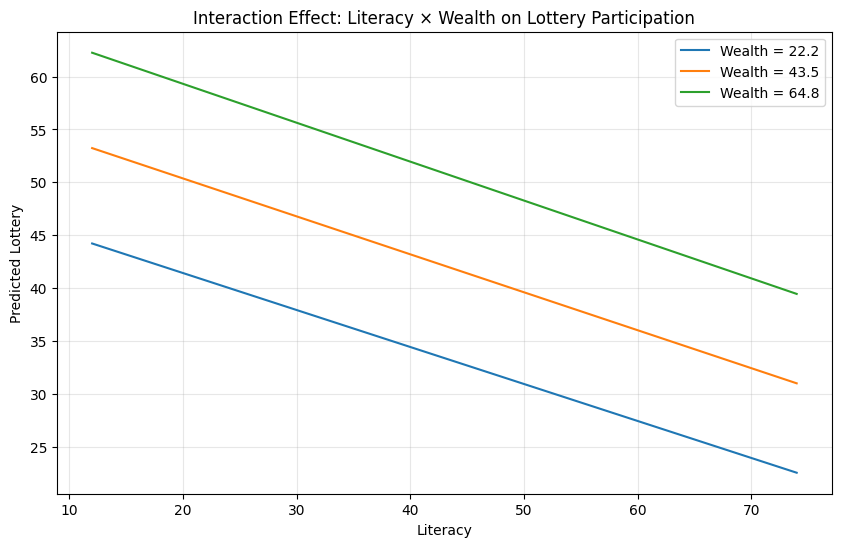

In [13]:

# Create a visualization of the interaction effect
import matplotlib.pyplot as plt
import numpy as np

# Create a grid of Literacy values
literacy_range = np.linspace(df_interaction['Literacy'].min(), 
                              df_interaction['Literacy'].max(), 100)

# Plot for different levels of Wealth (low, medium, high)
wealth_levels = [df_interaction['Wealth'].quantile(0.25),
                 df_interaction['Wealth'].quantile(0.50),
                 df_interaction['Wealth'].quantile(0.75)]

plt.figure(figsize=(10, 6))

for wealth in wealth_levels:
    # Predict Lottery for each literacy level at this wealth level
    predictions = (interaction_model.params['Intercept'] + 
                   interaction_model.params['Literacy'] * literacy_range +
                   interaction_model.params['Wealth'] * wealth +
                   interaction_model.params['Literacy:Wealth'] * literacy_range * wealth)
    
    plt.plot(literacy_range, predictions, label=f'Wealth = {wealth:.1f}')

plt.xlabel('Literacy')
plt.ylabel('Predicted Lottery')
plt.title('Interaction Effect: Literacy × Wealth on Lottery Participation')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()



The plot shows how the relationship between Literacy and Lottery participation changes at different levels of Wealth. If the lines are parallel, there's no interaction. If they have different slopes, there's an interaction effect.



## 5. Conclusion

This notebook provided an overview of advanced linear models, including Generalized Linear Models (GLMs), Generalized Additive Models (GAMs), and interaction terms. These models offer greater flexibility than standard linear models and can be used to model a wider variety of data and relationships.

### Key Takeaways

**Generalized Linear Models (GLMs)** extend linear regression to handle non-normal response variables by using appropriate probability distributions and link functions. They are particularly useful for count data, binary outcomes, and positive continuous data.

**Generalized Additive Models (GAMs)** extend GLMs by allowing non-linear relationships between predictors and the response through the use of smooth functions. They maintain interpretability while capturing complex patterns in the data.

**Interaction Terms** allow us to capture the combined effects of multiple predictors, revealing how the effect of one variable depends on the level of another. They are essential for understanding complex relationships in multivariate data.

By understanding and utilizing these advanced techniques, you can build more powerful and accurate predictive models that better reflect the complexity of real-world data.

### When to Use Each Model

| Model | Use When |
|-------|----------|
| **Linear Regression** | Response is continuous and normally distributed, relationships are linear |
| **Logistic Regression** | Response is binary (0/1) |
| **GLM (Poisson)** | Response is count data (0, 1, 2, ...) |
| **GLM (Gamma)** | Response is positive continuous with constant coefficient of variation |
| **GAM** | Relationships are non-linear but you want to maintain interpretability |
| **Interaction Terms** | The effect of one variable depends on another variable |

### Next Steps

- Experiment with different GLM families for various types of data
- Try GAMs on datasets with known non-linear relationships
- Practice identifying and interpreting interaction effects
- Combine these techniques (e.g., GAMs with interaction terms)



## 6. References

- [The ultimate beginner's guide to generalized linear models (GLMs)](https://albert-rapp.de/posts/14_glms/14_glms)
- [A Comprehensive Guide to Interaction Terms in Linear Regression](https://developer.nvidia.com/blog/a-comprehensive-guide-to-interaction-terms-in-linear-regression/)
- [Understanding Generalized Additive Models (GAMs): A Comprehensive Guide](https://www.analyticsvidhya.com/blog/2023/09/understanding-generalized-additive-models-gams-a-comprehensive-guide/)
- [statsmodels documentation](https://www.statsmodels.org/stable/index.html)
- [pygam documentation](https://pygam.readthedocs.io/en/latest/)
- [Penn State STAT 504 - GLMs](https://online.stat.psu.edu/stat504/lesson/6/6.1)
